# Using the model in uni-variate linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linear_regression import LinearRegressionModel, plot_linear_fit

In [2]:
data = pd.read_csv('../data/world-happiness-report-2017.csv')
data.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
train_data = data.sample(frac = 0.8)
test_data = data.drop(train_data.index)

input_param_name = 'Economy..GDP.per.Capita.'
output_param_name = 'Happiness.Score'

x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

x_test = test_data[input_param_name].values
y_test = test_data[output_param_name].values

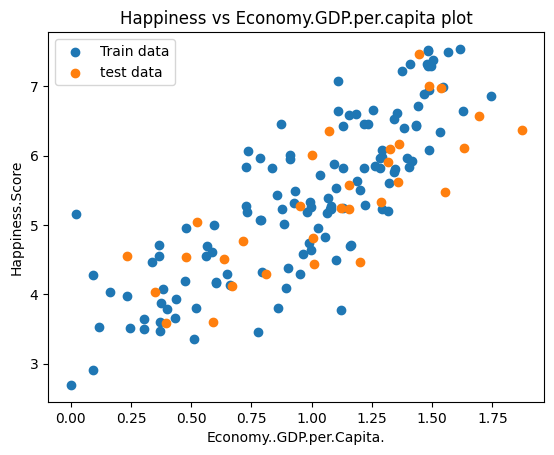

In [4]:
plt.scatter(x_train,y_train,label='Train data')
plt.scatter(x_test,y_test,label='test data')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Happiness vs Economy.GDP.per.capita plot')
plt.legend()
plt.show()

In [5]:
model = LinearRegressionModel(x_train, y_train)
hist = model.train(n_itr=50000, alpha=0.01)
print(f"Initial cost: {hist[0]}, final cost: {hist[-1]}")

 33%|███████████████████████▉                                                 | 16356/50000 [00:00<00:00, 81123.81it/s]

Step 0: cost: 15.0217
Step 5000: cost: 0.2163
Step 10000: cost: 0.2163
Step 15000: cost: 0.2163


 65%|███████████████████████████████████████████████▍                         | 32462/50000 [00:00<00:00, 78366.57it/s]

Step 20000: cost: 0.2163
Step 25000: cost: 0.2163
Step 30000: cost: 0.2163
Step 35000: cost: 0.2163


100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 78469.90it/s]

Step 40000: cost: 0.2163
Step 45000: cost: 0.2163
Initial cost: 15.021672249477676, final cost: 0.2162808566267656


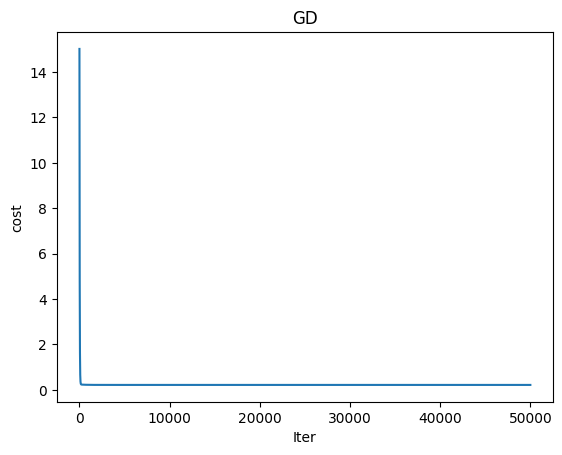

In [6]:
plt.plot(range(50000), hist)
plt.xlabel('Iter')
plt.ylabel('cost')
plt.title('GD')
plt.show()

In [7]:
predictions_num = 100
x_predictions = np.linspace(x_train.min(),x_train.max(),predictions_num).reshape(predictions_num,1)
y_predictions = model.predict(x_predictions)

In [8]:
print(model.evaluate(x_train, y_train, evaluate_method='r_score'))
print(model.evaluate(x_test.reshape(-1, 1), y_test.reshape(-1, 1), evaluate_method='r_score'))

0.6769475156935321
0.5486126717743794


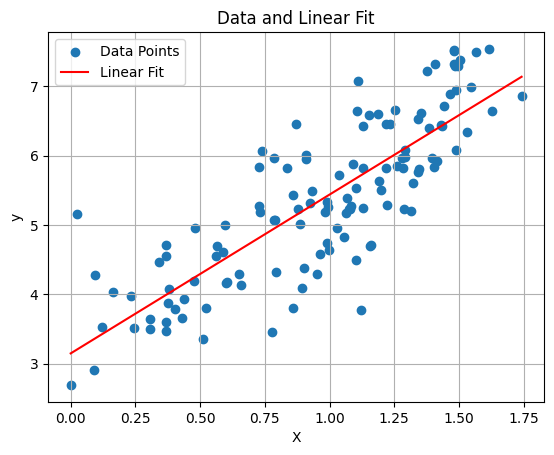

In [10]:
w = model.w[1][0]
b = model.w[0][0]
plot_linear_fit(w, b, x_train, y_train)